<a href="https://colab.research.google.com/github/kouliki/oibsip_2/blob/main/Unemployment_Oasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1- Install kaggle
!pip install kaggle

In [ ]:
#Upload you API token kaggle.json:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"koulikimahato","key":"a35738acb7889b4e27cc8d7e82f549f3"}'}

In [ ]:
#Create a directory kaggle , move the kaggle.json to kaggle directory , change permissions to the file :
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! kaggle datasets download -d gokulrajkmv/unemployment-in-india

Dataset URL: https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india
License(s): other
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 30.0MB/s]


In [ ]:
! unzip unemployment-in-india.zip

Archive:  unemployment-in-india.zip
  inflating: Unemployment in India.csv  
  inflating: Unemployment_Rate_upto_11_2020.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/Unemployment in India.csv")

In [ ]:
df=pd.read_csv("Unemployment in India.csv")

In [ ]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# ***Handling missing values***

In [ ]:
print("the null values are :")
print("\n")
print(df.isnull().sum())
print("\n")

df = df.dropna()
print("After removing the null values the new count is :")
print("\n")
print(df.isnull().sum())
print("\n")

print("the duplicated values count:")
print(df.duplicated().sum())
print("\n")

print("Renaming the columns after removing the starting space")
print("\n")
df.columns=df.columns.str.strip()
df.head()



the null values are :


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


After removing the null values the new count is :


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


the duplicated values count:
0


Renaming the columns after removing the starting space




,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Summary statistics

In [ ]:
print("overll statistics:")
print("\n")
print(df.describe())
print("\n")

# mean unemployment rate
mean_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# median unemploymwnt rate
median_unemployment = df['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployed rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')


overll statistics:


       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                         

In [ ]:
import plotly.graph_objs as go

# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create Plotly figure
fig = go.Figure()

# Add scatter trace
fig.add_trace(go.Scatter(x=mean_unemployment_over_time.index,
                         y=mean_unemployment_over_time.values,
                         mode='lines+markers',
                         name='Unemployment Rate',
                         marker=dict(symbol='circle',
                                     size=12,
                                     color='green'),
                         line=dict(color='coral', width=4)))

# Customize layout
fig.update_layout(title='Unemployment Rate Over Time',
                  xaxis_title='Date',
                  yaxis_title='Estimated Unemployment Rate (%)',
                  template='plotly',
                  width=1000,height=600)

# Show interactive plot
fig.show()


unemployment rate was more in the year 2020

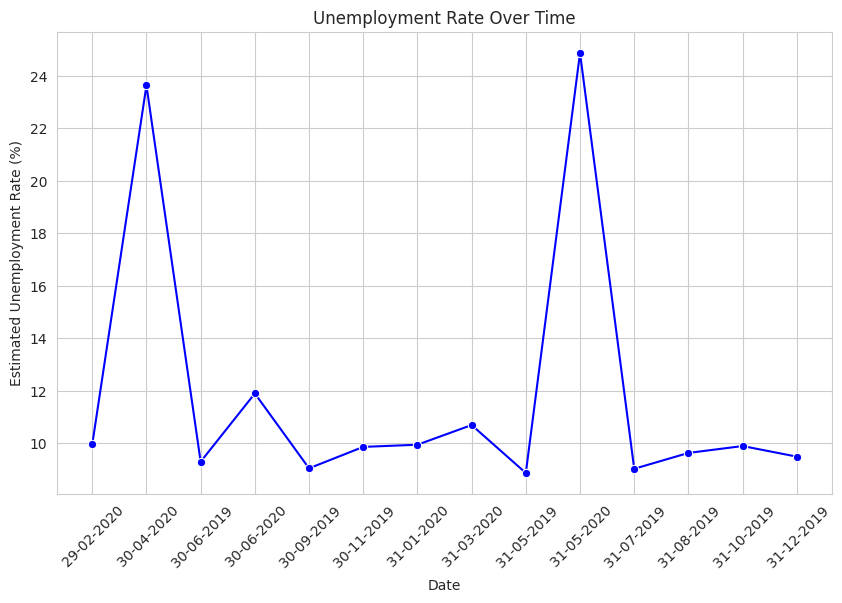

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and contains the necessary data
# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_unemployment_over_time, x='Date', y='Estimated Unemployment Rate (%)', marker='o', color='blue')

# Customize labels and title
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


unemployment rate was more in the year ***2020***

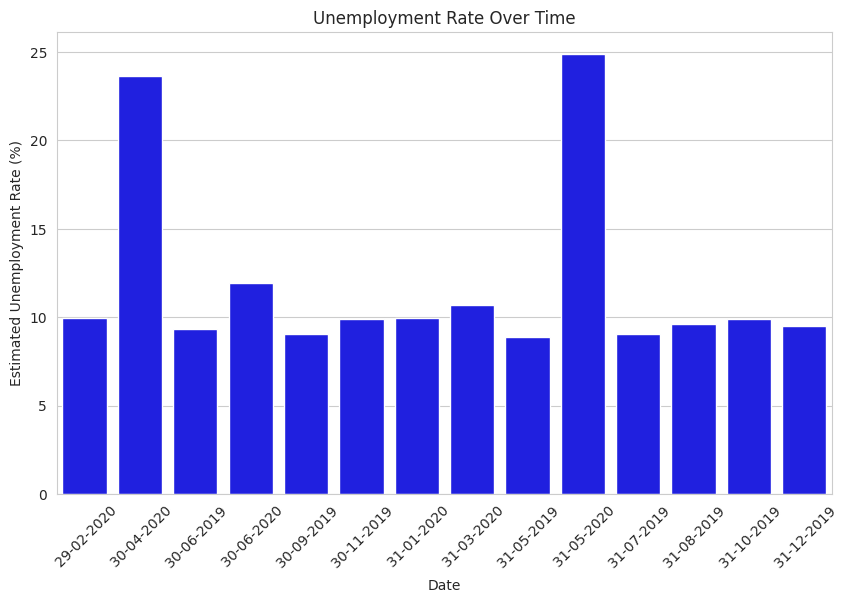

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and contains the necessary data
# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the seaborn lineplot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_unemployment_over_time, x='Date', y='Estimated Unemployment Rate (%)',color='blue')

# Customize labels and title
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


unemployment on the basis of region by region

In [ ]:
import altair as alt
# Group data by region and calculate mean unemployment rate
mean_unemployment_by_region = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Create the bar chart
bars = alt.Chart(mean_unemployment_by_region).mark_bar(opacity=0.7).encode(
    x=alt.X('Region', title='Region', sort='-y'),
    y=alt.Y('Estimated Unemployment Rate (%)', title='Estimated Unemployment Rate (%)'),
    color=alt.Color('Region', legend=None),
    tooltip=['Region', alt.Tooltip('Estimated Unemployment Rate (%)', title='Mean Unemployment Rate')]).properties(title='Average Unemployment Rate by Region',
    width=1600,
    height=500)

# Add annotations for mean values
annotations = bars.mark_text(align='center', baseline='bottom', dy=-5).encode(
    text=alt.Text('Estimated Unemployment Rate (%):Q', format='.2f'),size=alt.value(14)
)

# Combine the bars and annotations
chart = (bars + annotations)

# Show the chart
chart.configure(background='white').interactive().configure_axis(labelFontSize=14)

alt.LayerChart(...)

Unemployment on the basis of area

In [ ]:
import altair as alt
# Group data by region and calculate mean unemployment rate
mean_unemployment_by_region = df.groupby('Area')['Estimated Employed'].mean().reset_index()

# Create the bar chart
bars = alt.Chart(mean_unemployment_by_region).mark_bar(opacity=0.7).encode(
    x=alt.X('Area', title='Area', sort='-y'),
    y=alt.Y('Estimated Employed', title='Estimated Employed'),
    color=alt.Color('Area', legend=None),
    tooltip=['Area', alt.Tooltip('Estimated Employed', title='Mean Unemployment Rate')]).properties(title='Average Unemployment Rate by Region',
    width=1600,
    height=500)

# Add annotations for mean values
annotations = bars.mark_text(align='center', baseline='bottom', dy=-5).encode(
    text=alt.Text('Estimated Employed:Q', format='.2f'),size=alt.value(14)
)

# Combine the bars and annotations
chart = (bars + annotations)

# Show the chart
chart.configure(background='white').interactive().configure_axis(labelFontSize=14)

alt.LayerChart(...)

# Unemployment rate is more in rural **areas**

In [ ]:
import altair as alt
# Group data by region and calculate mean unemployment rate
mean_unemployment_by_region = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Create the bar chart
bars = alt.Chart(mean_unemployment_by_region).mark_bar(opacity=0.7).encode(
    x=alt.X('Area', title='Area', sort='-y'),
    y=alt.Y('Estimated Unemployment Rate (%)', title='Estimated Unemployment Rate (%)'),
    color=alt.Color('Area', legend=None),
    tooltip=['Area', alt.Tooltip('Estimated Unemployment Rate (%)', title='Mean Unemployment Rate')]).properties(title='Average Unemployment Rate by Region',
    width=1600,
    height=500)

# Add annotations for mean values
annotations = bars.mark_text(align='center', baseline='bottom', dy=-5).encode(
    text=alt.Text('Estimated Unemployment Rate (%):Q', format='.2f'),size=alt.value(14)
)

# Combine the bars and annotations
chart = (bars + annotations)

# Show the chart
chart.configure(background='white').interactive().configure_axis(labelFontSize=14)

alt.LayerChart(...)

Unemployment more in urban areas

# **URBAN VS RURAL**

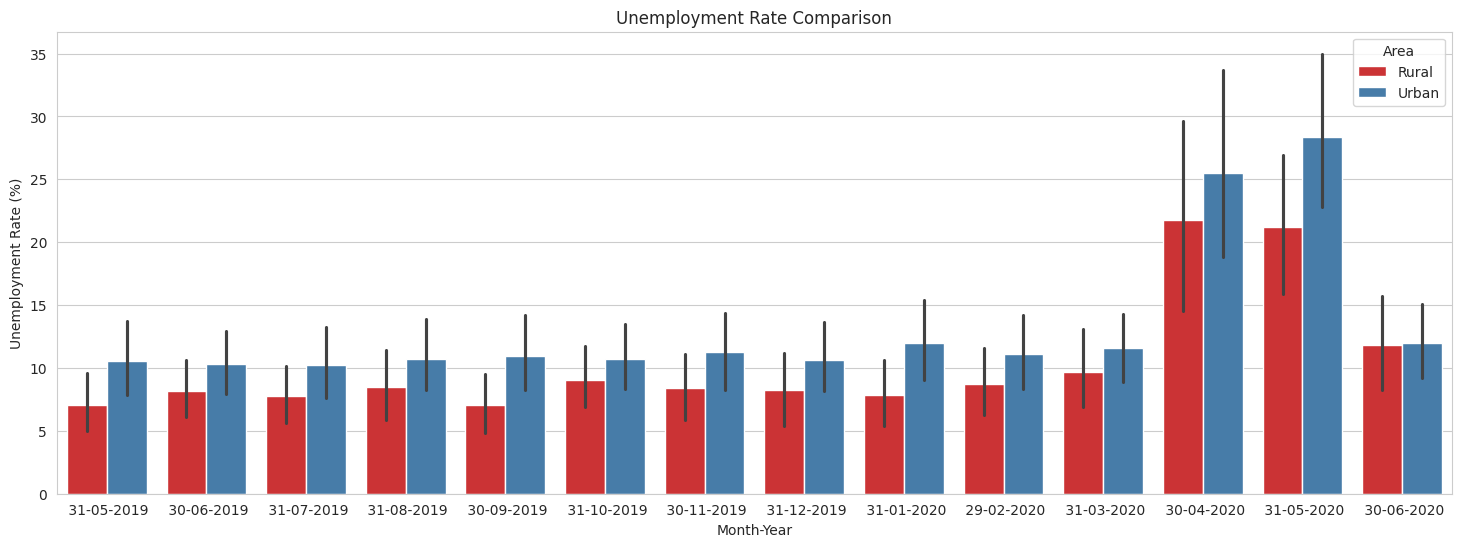

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 6))

# Create the bar plot
sns.barplot(x='Date', y='Estimated Unemployment Rate (%)', hue='Area', data=df, palette='Set1')

# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate Comparison")

# Show the plot
plt.show()


From the graph we found that in the year 2020 april month unemployment rate was more in rural areas in camparison with the other areas , whereas in 2020 may only in 31st the unemployement rate of urban areas also started increasing more due to COVID times.
- In the year of june 30 th 2020 both urban and the rural has the same unemployment rate.

<ipython-input-24-ff6abc61db91>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




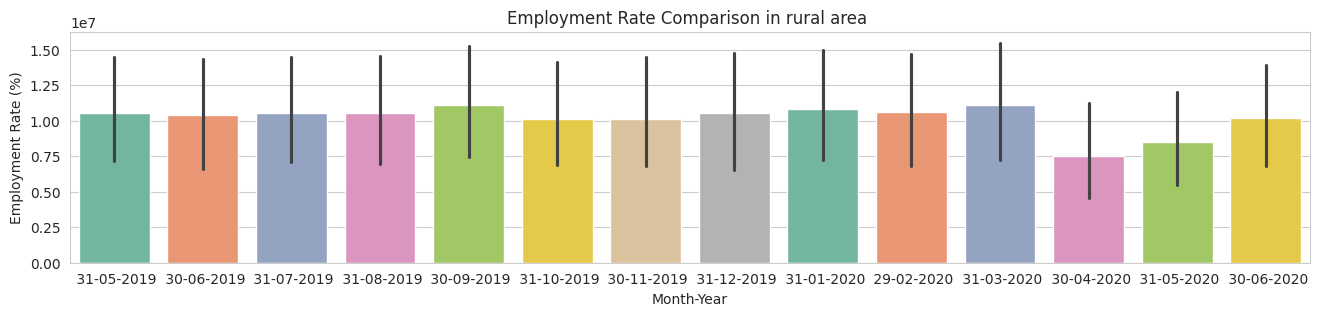

In [ ]:
plt.figure(figsize=(16,3))
df_rural=df[df['Area']=='Rural']

sns.barplot(x='Date',y='Estimated Employed',data=df_rural,palette='Set2')
# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('Employment Rate (%)')
plt.title("Employment Rate Comparison in rural area ")

# Show the plot
plt.show()


<ipython-input-25-ff6abc61db91>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




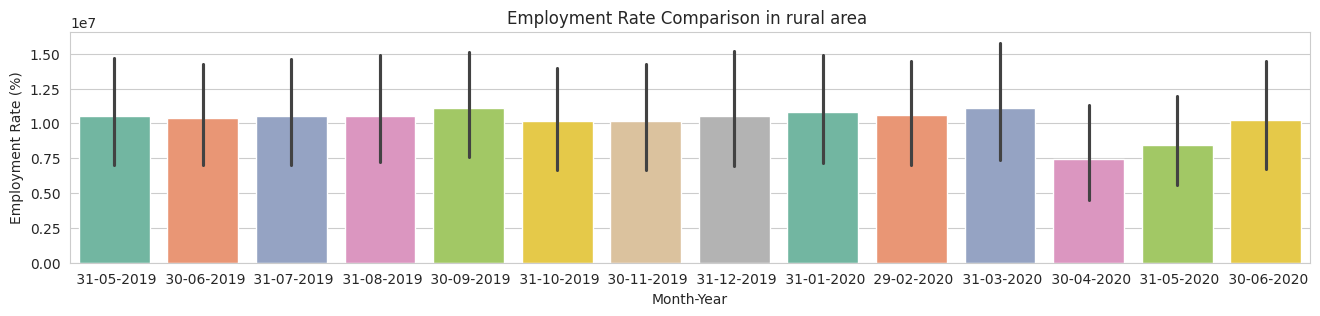

In [ ]:
plt.figure(figsize=(16,3))
df_rural=df[df['Area']=='Rural']

sns.barplot(x='Date',y='Estimated Employed',data=df_rural,palette='Set2')
# Set labels and title
plt.xlabel('Month-Year')
plt.ylabel('Employment Rate (%)')
plt.title("Employment Rate Comparison in rural area ")

# Show the plot
plt.show()

unemployment rates across various zones

In [ ]:
region_mapping = {
    "Chhattisgarh": "Central","Madhya Pradesh": "Central","Uttar Pradesh": "Central","Uttarakhand": "Central",
    "Bihar": "Eastern","Jharkhand": "Eastern","Odisha": "Eastern","West Bengal": "Eastern",
    "Arunachal Pradesh": "Northeast","Assam": "Northeast","Meghalaya": "Northeast","Mizoram": "Northeast","Nagaland": "Northeast","Manipur": "Northeast","Sikkim": "Northeast","Tripura": "Northeast",
    "Haryana": "Northern","Chandigarh": "Northern","Delhi": "Northern","Himachal Pradesh": "Northern","Jammu & Kashmir": "Northern","Punjab": "Northern","Rajasthan": "Northern",
    "Andhra Pradesh": "Southern","Karnataka": "Southern","Puducherry": "Southern","Kerala": "Southern","Tamil Nadu": "Southern","Telangana": "Southern",
    "Goa": "Western","Gujarat": "Western","Maharashtra": "Western"
}

def zone_map(state):
  return region_mapping.get(state,'unknown')

# Create a new column 'Zone' by mapping 'Region' column using the region_mapping dictionary
df['Zone'] = df['Region'].map(region_mapping).fillna('Unknown')
df.value_counts("Zone")

Zone
Northern     173
Southern     166
Eastern      112
Central      111
Northeast     98
Western       80
Name: count, dtype: int64

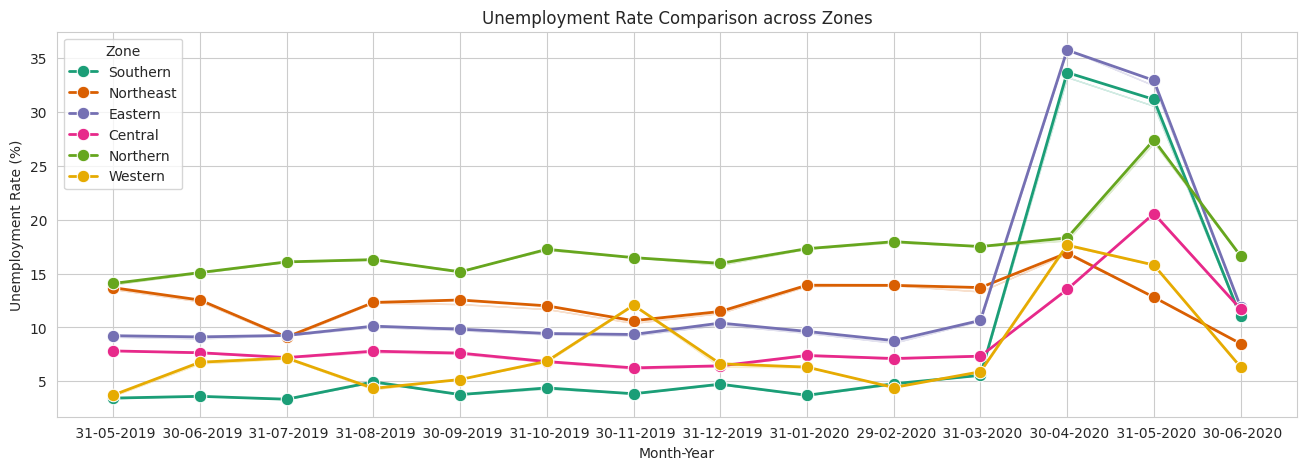

In [ ]:
plt.figure(figsize = (16,5))
sns.lineplot(x = 'Date', y = 'Estimated Unemployment Rate (%)', data = df,
            hue = 'Zone', errorbar=('ci', 0),palette = 'Dark2', marker='o', markersize=9, linewidth=2)

plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate Comparison across Zones");

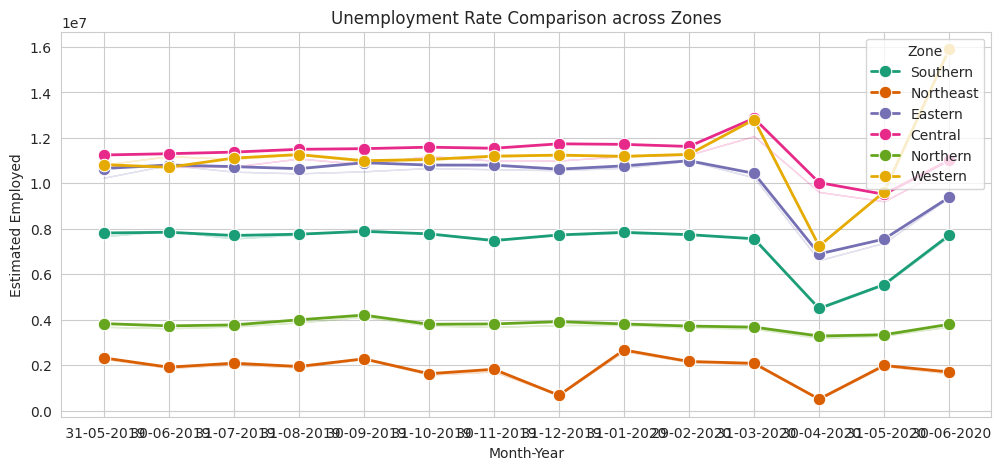

In [ ]:
plt.figure(figsize = (12,5))
sns.lineplot(x = 'Date', y = 'Estimated Employed', data = df,
            hue = 'Zone', errorbar=('ci', 0),palette = 'Dark2', marker='o', markersize=9, linewidth=2)

plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Unemployment Rate Comparison across Zones");

# Data Preprocessing of the dataset after lockdown

In [ ]:
df=pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")

In [ ]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [ ]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
print("the null values are :")
print("\n")
print(df.isnull().sum())
print("\n")

df = df.dropna()
print("After removing the null values the new count is :")
print("\n")
print(df.isnull().sum())
print("\n")

print("the duplicated values count:")
print(df.duplicated().sum())
print("\n")

print("Renaming the columns after removing the starting space")
print("\n")
df.columns=df.columns.str.strip()
df.head()


the null values are :


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


After removing the null values the new count is :


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


the duplicated values count:
0


Renaming the columns after removi

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
print("overll statistics:")
print("\n")
print(df.describe())
print("\n")

# mean unemployment rate
mean_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# median unemploymwnt rate
median_unemployment = df['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployed rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')


overll statistics:


       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       267.000000        2.670000e+02   
mean                         12.236929        1.396211e+07   
std                          10.803283        1.336632e+07   
min                           0.500000        1.175420e+05   
25%                           4.845000        2.838930e+06   
50%                           9.650000        9.732417e+06   
75%                          16.755000        2.187869e+07   
max                          75.850000        5.943376e+07   

       Estimated Labour Participation Rate (%)   longitude    latitude  
count                               267.000000  267.000000  267.000000  
mean                                 41.681573   22.826048   80.532425  
std                                   7.845419    6.270731    5.831738  
min                                  16.770000   10.850500   71.192400  
25%                                  37.265000   18.112

# **unemployment rate over time in a graph**

In [ ]:
import plotly.graph_objs as go

# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create Plotly figure
fig = go.Figure()

# Add scatter trace
fig.add_trace(go.Scatter(x=mean_unemployment_over_time.index,
                         y=mean_unemployment_over_time.values,
                         mode='lines+markers',
                         name='Unemployment Rate',
                         marker=dict(symbol='circle',
                                     size=12,
                                     color='green'),
                         line=dict(color='coral', width=4)))

# Customize layout
fig.update_layout(title='Unemployment Rate Over Time',
                  xaxis_title='Date',
                  yaxis_title='Estimated Unemployment Rate (%)',
                  template='plotly',
                  width=1000,height=600)

# Show interactive plot
fig.show()


Unemployment rate was more in the month of may 2020 after lockdown

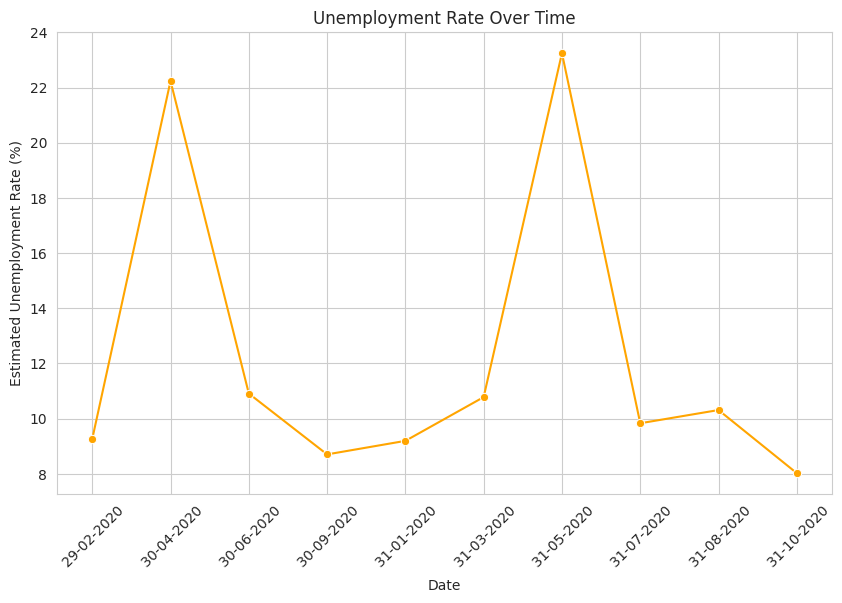

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and contains the necessary data
# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_unemployment_over_time, x='Date', y='Estimated Unemployment Rate (%)', marker='o', color='orange')

# Customize labels and title
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


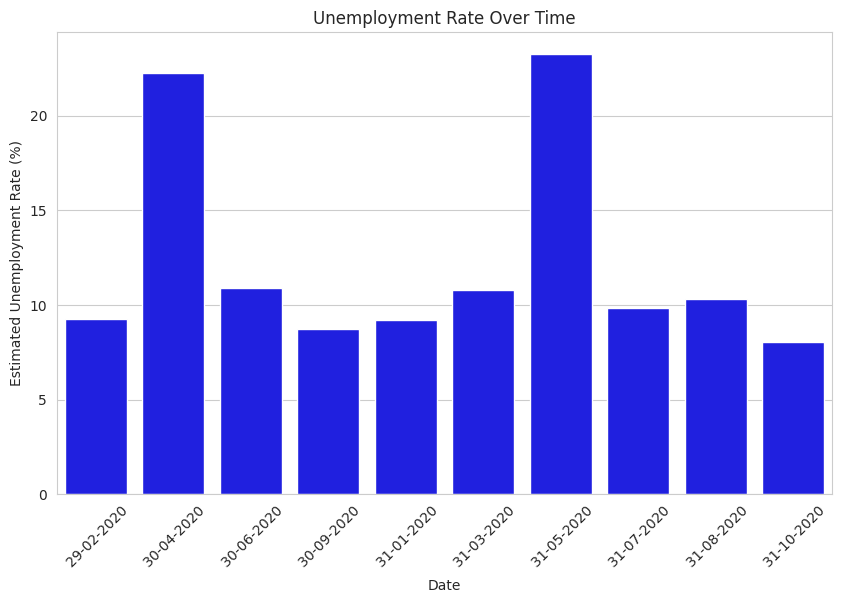

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and contains the necessary data
# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the seaborn lineplot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_unemployment_over_time, x='Date', y='Estimated Unemployment Rate (%)',color='blue')

# Customize labels and title
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# unemployment on the basis of region

In [ ]:
import altair as alt
# Group data by region and calculate mean unemployment rate
mean_unemployment_by_region = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Create the bar chart
bars = alt.Chart(mean_unemployment_by_region).mark_bar(opacity=0.7).encode(
    x=alt.X('Region', title='Region', sort='-y'),
    y=alt.Y('Estimated Unemployment Rate (%)', title='Estimated Unemployment Rate (%)'),
    color=alt.Color('Region', legend=None),
    tooltip=['Region', alt.Tooltip('Estimated Unemployment Rate (%)', title='Mean Unemployment Rate')]).properties(title='Average Unemployment Rate by Region',
    width=1600,
    height=500)

# Add annotations for mean values
annotations = bars.mark_text(align='center', baseline='bottom', dy=-5).encode(
    text=alt.Text('Estimated Unemployment Rate (%):Q', format='.2f'),size=alt.value(14)
)

# Combine the bars and annotations
chart = (bars + annotations)

# Show the chart
chart.configure(background='white').interactive().configure_axis(labelFontSize=14)

alt.LayerChart(...)

unemployment after lockdown was more in the state of haryana

# unemployment on the basis of estimated employed

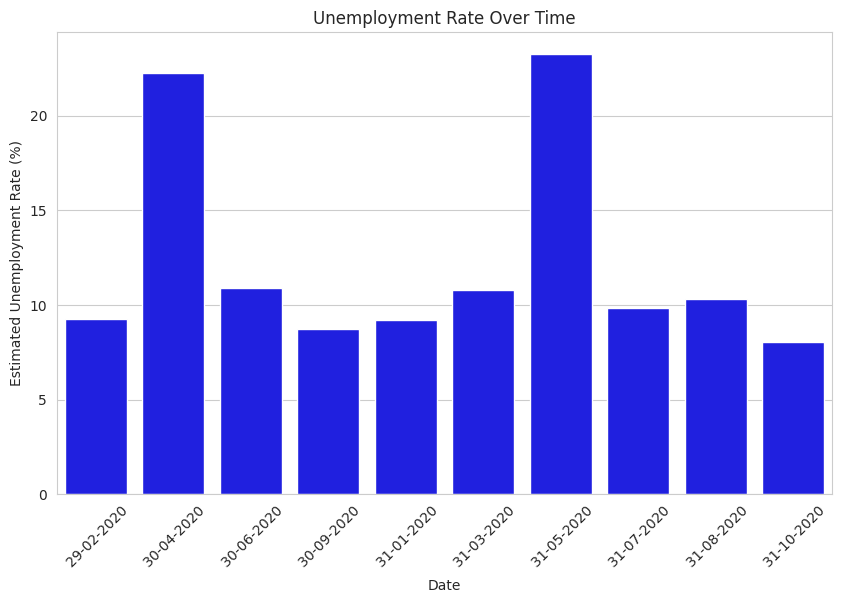

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and contains the necessary data
# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Set the style of seaborn
sns.set_style("whitegrid")

# Create the seaborn lineplot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_unemployment_over_time, x='Date', y='Estimated Unemployment Rate (%)',color='blue')

# Customize labels and title
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
import altair as alt
# Group data by region and calculate mean unemployment rate
mean_unemployment_by_region = df.groupby('Region')['Estimated Employed'].mean().reset_index()

# Create the bar chart
bars = alt.Chart(mean_unemployment_by_region).mark_bar(opacity=0.7).encode(
    x=alt.X('Region', title='Region', sort='-y'),
    y=alt.Y('Estimated Employed', title='Estimated Unemployment Rate (%)'),
    color=alt.Color('Region', legend=None),
    tooltip=['Region', alt.Tooltip('Estimated Employed', title='Mean Unemployment Rate')]).properties(title='Average Unemployment Rate by Region',
    width=1800,
    height=500)

# Add annotations for mean values
annotations = bars.mark_text(align='center', baseline='bottom', dy=-5).encode(
    text=alt.Text('Estimated Employed:Q', format='.2f'),size=alt.value(16)
)

# Combine the bars and annotations
chart = (bars + annotations)

# Show the chart
chart.configure(background='white').interactive().configure_axis(labelFontSize=14)

alt.LayerChart(...)

Estimed employed when compared with region utter pradesh is the highest.